<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#testing-the-sums" data-toc-modified-id="testing-the-sums-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>testing the sums</a></span></li><li><span><a href="#anharmonicity-values" data-toc-modified-id="anharmonicity-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>anharmonicity values</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sqrt

# testing the sums

In [2]:
def f1(N):
    return sum([cos(pi*n/N)**4 for n in range(N)])

def f2(N):
    return sum([cos(pi*(n-0.5)/N)**4 for n in range(N)])

In [3]:
myN = np.arange(2,100)
myf1 = np.array([f1(N) for N in myN])
myf2 = np.array([f2(N) for N in myN])

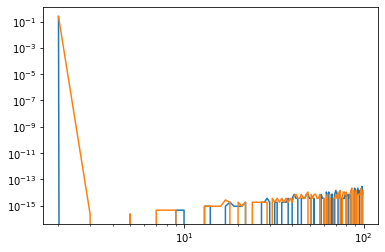

In [4]:
plt.plot(myN,abs(myf1-3*myN/8))
plt.plot(myN,abs(myf2-3*myN/8))
plt.xscale('log')
plt.yscale('log')

# anharmonicity values

In [6]:
import numpy as np
from scipy.constants import hbar, e, h

# parameters
N = 1000
Lj = 1e-9
L0 = 0.5e-9
Cj = 0e-15
C0 = 10e-15

# Analytical formulas
def wm(m,N,Lj,L0,Cj,C0):
    c = np.cos(np.pi*m/N)
    return 1/np.sqrt((Lj+L0)*(Cj+C0/(2-2*c)))
def zpf_1(m,N,Lj,L0,Cj,C0):
    c = np.cos(np.pi*m/N)
    imY = N*(C0-2*Cj*(c-1))/(1-c**2)
    return np.sqrt(hbar/wm(m,N,Lj,L0,Cj,C0)/imY)
def ev(m,n,N,Lj,L0,Cj,C0):
    return np.sqrt(2/N)*np.sin(np.pi*m*n/N)
def zpf_n(m,n,N,Lj,L0,Cj,C0):
    return zpf_1(m,N,Lj,L0,Cj,C0)*(ev(m,n,N,Lj,L0,Cj,C0)-ev(m,n-1,N,Lj,L0,Cj,C0))/ev(m,1,N,Lj,L0,Cj,C0)
def anh(m,N,Lj,L0,Cj,C0):
    phi0 = hbar/2/e
    return (Lj/(Lj+L0))**4/2/phi0**2/Lj*sum([np.absolute(zpf_n(m,n,N,Lj,L0,Cj,C0))**4 for n in range(1,N+1)])

# full derivation
w = wm(1,N,Lj,L0,Cj,C0) # frequency of mode 1 (the fundamental mode)
A_exact = anh(1,N,Lj,L0,Cj,C0)/h # Anharmonicity in Hertz

# in the limit N>>1
A_large_N = 3/4*np.pi**2*e**2*(Lj/(Lj+L0))**3/N**3/C0/h

print("%.2e"%(w/2/np.pi))
print("%.2e"%(A_exact))
print("%.2e"%(A_large_N))

1.29e+08
8.50e+00
8.50e+00
